# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html


# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jedi.plugins.django import mapping

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [5]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc_raw['Latitude Group'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Below -10.5', 'Above or Equal -10.5'])

aggregated_results = sinasc_raw.groupby('Latitude Group').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
aggregated_results

/tmp/ipykernel_17455/3357233672.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_results = sinasc_raw.groupby('Latitude Group').agg({


PESO                                              \
                           sum         mean  min   max  median         std   
Latitude Group                                                               
Below -10.5           42098594  3240.098053  258  5985  3270.0  531.815114   
Above or Equal -10.5  45555148  3246.055864  295  5190  3275.0  556.487709   

                                     IDADEPAI                                \
                                var       sum       mean   min   max median   
Latitude Group                                                                
Below -10.5           282827.315354  198460.0  30.903145  15.0  86.0   30.0   
Above or Equal -10.5  309678.570242   38038.0  32.126689  16.0  73.0   31.0   

                                           
                           std        var  
Latitude Group                             
Below -10.5           7.707002  59.397875  
Above or Equal -10.5  8.034214  64.548602

In [7]:
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] >= -10.5, '>= -10.5', '< -10.5')

aggregated_results = sinasc_raw.groupby('faixa_latitude').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

aggregated_results

PESO                                              \
                     sum         mean  min   max  median         std   
faixa_latitude                                                         
< -10.5         42101809  3240.096121  258  5985  3270.0  531.794694   
>= -10.5        45555148  3246.055864  295  5190  3275.0  556.487709   

                                 APGAR1                                        \
                          var       sum      mean  min   max median       std   
faixa_latitude                                                                  
< -10.5         282805.596163  104599.0  8.070288  0.0  10.0    8.0  0.960765   
>= -10.5        309678.570242  114559.0  8.199771  0.0  10.0    8.0  1.002839   

                          
                     var  
faixa_latitude            
< -10.5         0.923069  
>= -10.5        1.005686

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude Group'

In [9]:
sinasc_raw[['munResNome']]

,munResNome
0,Alta Floresta D'Oeste
1,Alta Floresta D'Oeste
2,Alta Floresta D'Oeste
3,Alto Alegre dos Parecis
4,Alta Floresta D'Oeste
...,...
27023,Vilhena
27024,Chupinguaia
27025,Vilhena
27026,Vilhena


In [10]:
tab2 = pd.cut(sinasc_raw['munResArea'],[sinasc_raw['munResArea'].min()-1,3000,sinasc_raw['munResArea'].max()+1])

In [12]:
sinasc_raw.groupby(tab2)[['QTDFILVIVO', 'QTDFILMORT']].agg([('Soma','sum'),
                                                            ('Média','mean'),
                                                            ('Mínimo','min'),
                                                            ('Máximo','max'),
                                                            ('Mediana','median'),
                                                            ('Desvio Padrão','std'),
                                                            ('Variância','var')])

/tmp/ipykernel_17455/1710030595.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(tab2)[['QTDFILVIVO', 'QTDFILMORT']].agg([('Soma','sum'),


QTDFILVIVO                                                \
                          Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResArea                                                                     
(458.978, 3000.0]       4773.0  0.924284    0.0   30.0     1.0      1.075442   
(3000.0, 34097.394]    22053.0  1.086890    0.0   14.0     1.0      1.191750   

                              QTDFILMORT                                  \
                    Variância       Soma     Média Mínimo Máximo Mediana   
munResArea                                                                 
(458.978, 3000.0]    1.156575     1260.0  0.244803    0.0    4.0     0.0   
(3000.0, 34097.394]  1.420268     5383.0  0.272116    0.0   28.0     0.0   

                                             
                    Desvio Padrão Variância  
munResArea                                   
(458.978, 3000.0]        0.551215  0.303838  
(3000.0, 34097.394]      0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [274]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude Group'

In [275]:
sinasc_2 = sinasc_raw['munResAlt']
sinasc_2.head()

0    338.0
1    338.0
2    338.0
3    397.0
4    338.0
Name: munResAlt, dtype: float64

In [276]:
# Exemplo de criação de um DataFrame
sinasc_2 = {
    'munResAlt': np.random.randint(1, 1000, 100),  # Criando uma variável numérica fictícia
    'var1': np.random.rand(100) * 100,  # Primeira variável numérica
    'var2': np.random.rand(100) * 50  # Segunda variável numérica
}
sinasc_2 = pd.DataFrame(sinasc_2)

In [278]:
# Determinar faixas de munResAlt
# Supondo que queremos dividir em faixas iguais (quartis, por exemplo):
faixas = pd.qcut(sinasc_2['munResAlt'], q=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])

In [279]:
sinasc_2['faixa_munResAlt'] = faixas

In [280]:
# Realizar o groupby com as faixas e calcular agregações para pelo menos duas variáveis
result = sinasc_2.groupby('faixa_munResAlt').agg({
    'var1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],  # Estatísticas para var1
    'var2': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']  # Estatísticas para var2
})

/tmp/ipykernel_6029/3384445259.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_2.groupby('faixa_munResAlt').agg({


In [248]:
result

var1                                             \
                         sum       mean       min        max     median   
faixa_munResAlt                                                           
Baixo            1221.158933  48.846357  2.364093  96.191656  49.809313   
Médio-Baixo      1309.300298  50.357704  4.508916  95.566495  54.395617   
Médio-Alto       1151.364929  47.973539  1.803605  98.813944  46.420555   
Alto             1102.914127  44.116565  3.577927  98.831227  35.643774   

                                               var2                       \
                       std          var         sum       mean       min   
faixa_munResAlt                                                            
Baixo            28.847010   832.149990  623.571563  24.942863  0.031608   
Médio-Baixo      24.589370   604.637128  631.914965  24.304422  2.367402   
Médio-Alto       31.712924  1005.709559  548.692142  22.862173  0.030738   
Alto             28.541833   814.636212  609.493985  24.379759  5.648207   

                                                              
                       max     median        std         var  
faixa_munResAlt                                               
Baixo            49.582398  23.370505  14.598258  213.109147  
Médio-Baixo      46.485076  23.594880  13.142789  172.732899  
Médio-Alto       49.393723  19.430401  15.487037  239.848311  
Alto             49.272523  24.290010  11.616593  134.945226

In [281]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude Group'

In [282]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}
imediatas

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Ariquemes': 'Ariquemes',
 'Alto Paraíso': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Jaru': 'Jaru',
 'Governador Jorge Teixeira': 'Jaru',
 "Machadinho D'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Costa Marques': 'Ji-Paraná',
 'Ji-Paraná': 'Ji-Paraná',
 'Mirante da Serra': 'Ji-Paraná',
 'Nova União': 'Ji-Paraná',
 'Ouro Preto do Oeste': 'Ji-Paraná',
 'Presidente Médici': 'Ji-Paraná',
 'São Francisco do Guaporé': 'Ji-Paraná',
 'São Miguel do Guaporé': 'Ji-Paraná',
 'Seringueiras': 'Ji-Paraná',
 'Teixeirópolis': 'Ji-Paraná',
 'Urupá': 'Ji-Paraná',
 'Vale do Paraíso': 'Ji-Paraná',
 'Cacoal': 'Cacoal',
 "Alta Floresta D'Oe

In [283]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude Group'

In [288]:
sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


<Axes: xlabel='imediatas', ylabel='idade_mãe'>

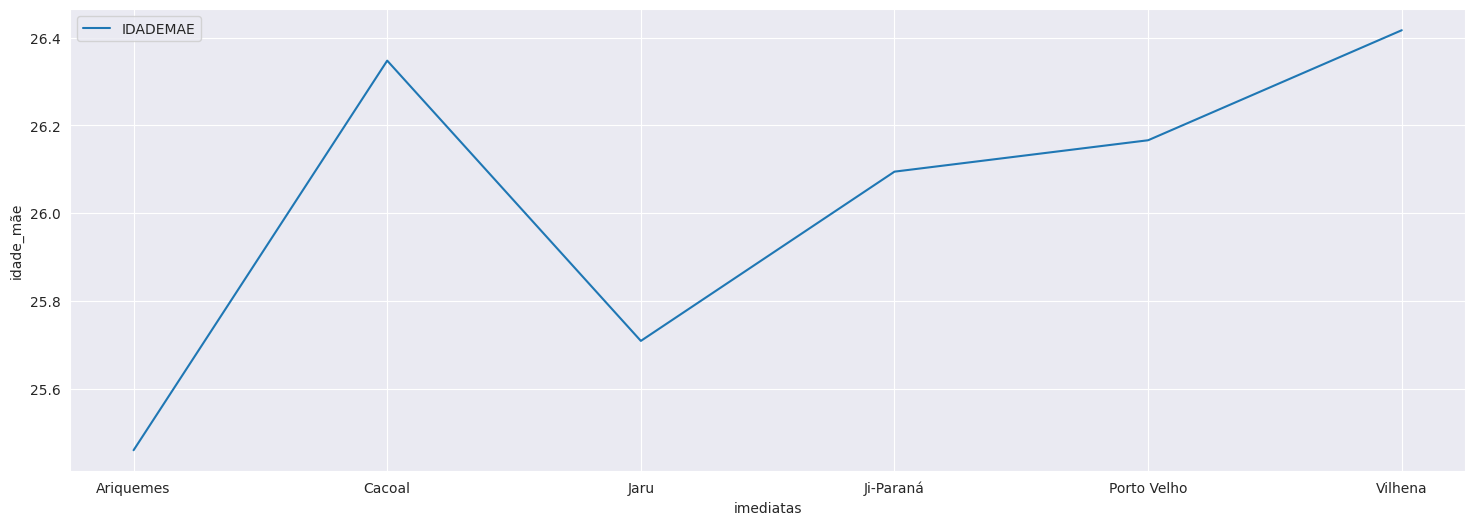

In [289]:
imediatas_idade_mae = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('idade_mãe')
plt.xlabel('imediatas')
imediatas_idade_mae

/tmp/ipykernel_6029/3555317422.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  municipio.set_xticklabels(municipio.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, "Alta Floresta D'Oeste"),
 Text(1, 0, 'Alto Alegre dos Parecis'),
 Text(2, 0, 'Novo Horizonte do Oeste'),
 Text(3, 0, 'Rolim de Moura'),
 Text(4, 0, "São Felipe D'Oeste"),
 Text(5, 0, 'Ariquemes'),
 Text(6, 0, 'Cujubim'),
 Text(7, 0, 'Alto Paraíso'),
 Text(8, 0, 'Monte Negro'),
 Text(9, 0, 'Jaru'),
 Text(10, 0, 'Rio Crespo'),
 Text(11, 0, 'Porto Velho'),
 Text(12, 0, 'Cacaulândia'),
 Text(13, 0, 'Itapuã do Oeste'),
 Text(14, 0, 'Ji-Paraná'),
 Text(15, 0, 'Buritis'),
 Text(16, 0, 'Vilhena'),
 Text(17, 0, 'Vale do Anari'),
 Text(18, 0, 'Candeias do Jamari'),
 Text(19, 0, 'Costa Marques'),
 Text(20, 0, 'Campo Novo de Rondônia'),
 Text(21, 0, "Machadinho D'Oeste"),
 Text(22, 0, 'Colorado do Oeste'),
 Text(23, 0, 'Nova Mamoré'),
 Text(24, 0, 'Urupá'),
 Text(25, 0, 'Ouro Preto do Oeste'),
 Text(26, 0, 'Corumbiara'),
 Text(27, 0, 'São Miguel do Guaporé'),
 Text(28, 0, 'Governador Jorge Teixeira'),
 Text(29, 0, "Santa Luzia D'Oeste"),
 Text(30, 0, 'Pimenta Bueno'),
 Text(31, 0, 'Mi

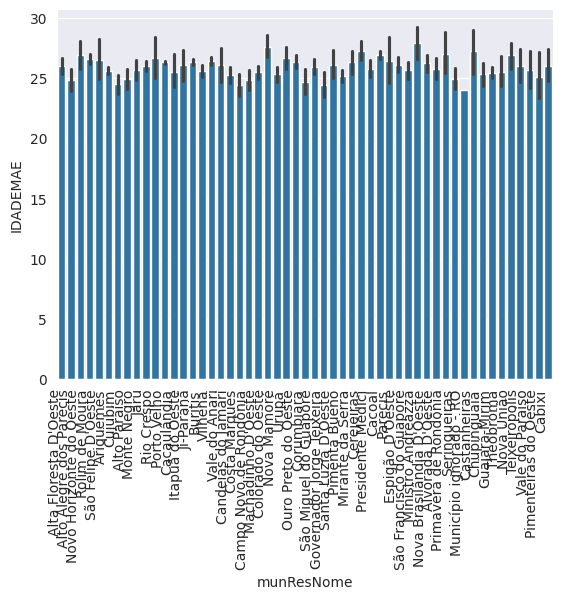

In [290]:
municipio = sns.barplot(x='munResNome', y='IDADEMAE', data=sinasc_raw)
municipio.set_xticklabels(municipio.get_xticklabels(), rotation=90, horizontalalignment='right')


/tmp/ipykernel_6029/1485628052.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  municipio2.set_xticklabels(municipio2.get_xticklabels(), rotation=90, horizontalalignment='righ')


ValueError: 'righ' is not a valid value for align; supported values are 'center', 'right', 'left'

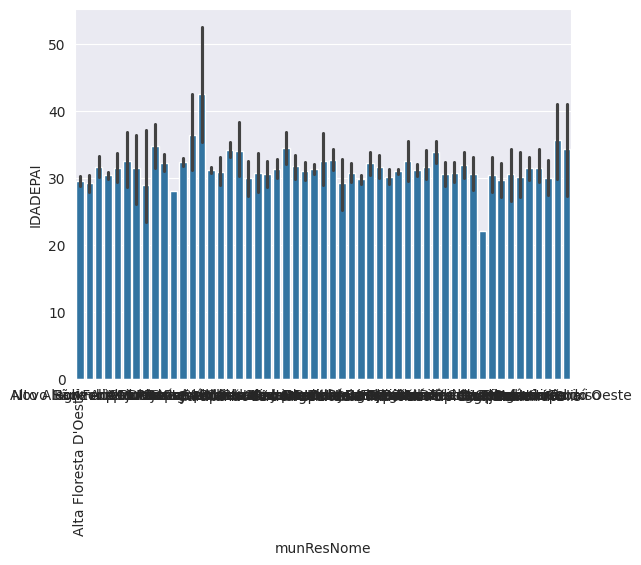

In [294]:
municipio2 = sns.barplot(x='munResNome', y='IDADEPAI', data=sinasc_raw)
municipio2.set_xticklabels(municipio2.get_xticklabels(), rotation=90, horizontalalignment='righ')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [13]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude Group'

In [14]:
mapping
{

    "Porto Velho": [0.736, 0.764, 0.819, 0.638],
    "Vilhena": [0.731, 0.734, 0.808, 0.659],
    "Cacoal": [0.718, 0.727, 0.821, 0.620],
    "Ji-Paraná": [0.714, 0.728, 0.810, 0.617],
    "Pimenta Bueno": [0.710, 0.726, 0.803, 0.613],
    "Ariquemes": [0.702, 0.716, 0.806, 0.600],
    "Rolim de Moura": [0.700, 0.709, 0.808, 0.598],
    "Cerejeiras": [0.692, 0.688, 0.799, 0.602],
    "Jaru": [0.689, 0.687, 0.825, 0.577],
    "Colorado do Oeste": [0.685, 0.676, 0.814, 0.584],
    "Ouro Preto do Oeste": [0.682, 0.687, 0.812, 0.569],
    "Espigão d Oeste": [0.672, 0.691, 0.819, 0.536],
    "Santa Luzia d Oeste": [0.670, 0.657, 0.812, 0.564],
    "Pimenteiras do Oeste": [0.665, 0.662, 0.816, 0.545],
    "Presidente Médici": [0.664, 0.671, 0.792, 0.550],
    "Castanheiras": [0.658, 0.650, 0.803, 0.547],
    "Guajará-Mirim": [0.657, 0.663, 0.823, 0.519],
    "Chupinguaia": [0.652, 0.659, 0.820, 0.514],
    "Cabixi": [0.650, 0.650, 0.757, 0.559],
    "Candeias do Jamari": [0.649, 0.652, 0.819, 0.512],
    "São Felipe d Oeste": [0.649, 0.615, 0.780, 0.571],
    "Cacaulândia": [0.646, 0.664, 0.801, 0.506],
    "São Miguel do Guaporé": [0.646, 0.644, 0.781, 0.537],
    "Mirante da Serra": [0.643, 0.673, 0.800, 0.494],
    "Alvorada d Oeste": [0.643, 0.654, 0.763, 0.534],
    "Teixeirópolis": [0.643, 0.653, 0.818, 0.498],
    "Nova Brasilândia d Oeste": [0.643, 0.664, 0.763, 0.524],
    "Rio Crespo": [0.643, 0.637, 0.813, 0.513],
    "Primavera de Rondônia": [0.641, 0.645, 0.799, 0.512],
    "Alta Floresta d Oeste": [0.641, 0.657, 0.763, 0.526],
    "Ministro Andreazza": [0.638, 0.647, 0.776, 0.518],
    "Novo Horizonte do Oeste": [0.634, 0.606, 0.799, 0.527],
    "Vale do Paraíso": [0.627, 0.641, 0.792, 0.485],
    "Alto Paraíso": [0.625, 0.664, 0.804, 0.457],
    "Parecis": [0.617, 0.604, 0.800, 0.485],
    "Buritis": [0.616, 0.650, 0.751, 0.479],
    "Itapuã do Oeste": [0.614, 0.633, 0.751, 0.488],
    "Corumbiara": [0.613, 0.630, 0.774, 0.473],
    "Cujubim": [0.612, 0.663, 0.789, 0.439],
    "Costa Marques": [0.611, 0.616, 0.751, 0.493],
    "São Francisco do Guaporé": [0.611, 0.657, 0.751, 0.462],
    "Urupá": [0.609, 0.621, 0.772, 0.471],
    "Monte Negro": [0.607, 0.645, 0.762, 0.454],

    "Seringueiras" : [0.598, 0.644, 0.779, 0.427],
    "Governador Jorge Teixeira" : [0.596, 0.627, 0.762, 0.444],
    "Machadinho d Oeste" : [0.596, 0.629, 0.755, 0.446],
    "Campo Novo de Rondônia" : [0.593, 0.667, 0.772, 0.404],
    "Alto Alegre dos Parecis" : [0.592, 0.603, 0.777, 0.443],
    "Theobroma" : [0.589, 0.622, 0.757, 0.434],
    "Nova União" : [0.587, 0.608, 0.753, 0.442],
    "Nova Mamoré" : [0.587, 0.619, 0.769, 0.424],
    "Vale do Anari" : [0.584, 0.626, 0.756, 0.421]

}
mapping

{'IntegerField': (None, 'int'),
 'BigIntegerField': (None, 'int'),
 'PositiveIntegerField': (None, 'int'),
 'SmallIntegerField': (None, 'int'),
 'CharField': (None, 'str'),
 'TextField': (None, 'str'),
 'EmailField': (None, 'str'),
 'GenericIPAddressField': (None, 'str'),
 'URLField': (None, 'str'),
 'FloatField': (None, 'float'),
 'BinaryField': (None, 'bytes'),
 'BooleanField': (None, 'bool'),
 'DecimalField': ('decimal', 'Decimal'),
 'TimeField': ('datetime', 'time'),
 'DurationField': ('datetime', 'timedelta'),
 'DateField': ('datetime', 'date'),
 'DateTimeField': ('datetime', 'datetime'),
 'UUIDField': ('uuid', 'UUID')}

In [23]:
# Assume sinasc_raw is your raw DataFrame
# Create a DataFrame for demonstration (replace this with your actual DataFrame)
sinasc_raw = pd.DataFrame({
    'munResNome': ['CityA', 'CityB', 'CityC'],
    'IDADEMAE': [25, 30, 35],
    'IDADEPAI': [28, 33, 38],
    # You can replace this with the actual data or computation
    'IDH': [0.8, 0.7, 0.9]
})

# Set 'munResNome' as the index
idh = sinasc_raw.set_index('munResNome')

# Ensure the 'IDH' column exists
if 'IDH' not in idh.columns:
    raise ValueError("'IDH' column is missing from the DataFrame. Please check your data.")

# Group the data based on the 'IDH' column
# and calculate required statistics for 'IDADEMAE' and 'IDADEPAI'
result = idh.groupby('IDH')[['IDADEMAE', 'IDADEPAI']].agg(['mean', 'median', 'std'])

# Display the resulting statistics
print(result)

    IDADEMAE            IDADEPAI           
        mean median std     mean median std
IDH                                        
0.7     30.0   30.0 NaN     33.0   33.0 NaN
0.8     25.0   25.0 NaN     28.0   28.0 NaN
0.9     35.0   35.0 NaN     38.0   38.0 NaN


Series([], Name: Value, dtype: int64)

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [201]:
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',

}


In [210]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'ESTCIVMAE', 'ESCMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO',
       'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO',
       'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude Group', 'faixa_lat

In [212]:
sinasc_raw[['munResNome', 'ESCMAE']]

,munResNome,ESCMAE
IDADEMAE,,
19,Alta Floresta D'Oeste,NaN
29,Alta Floresta D'Oeste,NaN
37,Alta Floresta D'Oeste,NaN
30,Alto Alegre dos Parecis,NaN
30,Alta Floresta D'Oeste,NaN
...,...,...
32,Vilhena,NaN
19,Chupinguaia,NaN
24,Vilhena,NaN


In [213]:
sinasc_raw.set_index('munResNome')['ESCMAE'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std','var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,0.0,NaN,NaN,NaN,NaN,NaN,NaN
des_regular,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [214]:
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}


In [218]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'ESTCIVMAE', 'ESCMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO',
       'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO',
       'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude Group', 'faixa_lat

In [222]:
sinasc_raw[['munResNome', 'ESCMAE', 'IDADEPAI']]

,munResNome,ESCMAE,IDADEPAI
IDADEMAE,,,
19,Alta Floresta D'Oeste,NaN,26.0
29,Alta Floresta D'Oeste,NaN,24.0
37,Alta Floresta D'Oeste,NaN,32.0
30,Alto Alegre dos Parecis,NaN,24.0
30,Alta Floresta D'Oeste,NaN,27.0
...,...,...,...
32,Vilhena,NaN,35.0
19,Chupinguaia,NaN,NaN
24,Vilhena,NaN,30.0


In [223]:
sinasc_raw.set_index('munResNome')['ESCMAE'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Acima de 100 Milhões,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Acima de 200 Milhões,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Acima de 300 Milhões,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Acima de 500 Milhões,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Até 100 Milhões,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,144654.0,31.108387,15.0,70.0,30.0,7.767477,60.333700
Acima de 100 Milhões,18253.0,31.744348,17.0,73.0,31.0,8.008643,64.138361
Acima de 200 Milhões,5796.0,30.187500,16.0,55.0,29.0,7.659388,58.666230
Acima de 300 Milhões,8691.0,30.819149,16.0,64.0,30.0,7.858123,61.750095
Acima de 500 Milhões,20869.0,31.381955,17.0,60.0,31.0,7.583172,57.504493
Até 100 Milhões,7021.0,31.626126,17.0,67.0,30.0,7.665510,58.760038
